<a href="https://colab.research.google.com/github/Dipak9699-ds/FlyTheNest_Projects/blob/main/Electric_Vehicles_Market_Size_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings as wr
wr.filterwarnings('ignore')
%matplotlib inline

In [2]:
# Load Dataset
ev_data = pd.read_csv('Electric_Vehicle_Population_Data.csv')
ev_data.head()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,5YJYGDEE1L,King,Seattle,WA,98122.0,2020,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,291,0,37.0,125701579,POINT (-122.30839 47.610365),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
1,7SAYGDEE9P,Snohomish,Bothell,WA,98021.0,2023,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,1.0,244285107,POINT (-122.179458 47.802589),PUGET SOUND ENERGY INC,5.306105e+10
2,5YJSA1E4XK,King,Seattle,WA,98109.0,2019,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,270,0,36.0,156773144,POINT (-122.34848 47.632405),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
3,5YJSA1E27G,King,Issaquah,WA,98027.0,2016,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,210,0,5.0,165103011,POINT (-122.03646 47.534065),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10
4,5YJYGDEE5M,Kitsap,Suquamish,WA,98392.0,2021,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,23.0,205138552,POINT (-122.55717 47.733415),PUGET SOUND ENERGY INC,5.303594e+10


In [3]:
# Dataset Information
ev_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177866 entries, 0 to 177865
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         177866 non-null  object 
 1   County                                             177861 non-null  object 
 2   City                                               177861 non-null  object 
 3   State                                              177866 non-null  object 
 4   Postal Code                                        177861 non-null  float64
 5   Model Year                                         177866 non-null  int64  
 6   Make                                               177866 non-null  object 
 7   Model                                              177866 non-null  object 
 8   Electric Vehicle Type                              177866 non-null  object

In [4]:
# Missing/Null Values Count
ev_data.isnull().sum()

,0
VIN (1-10),0
County,5
City,5
State,0
Postal Code,5
Model Year,0
Make,0
Model,0
Electric Vehicle Type,0
Clean Alternative Fuel Vehicle (CAFV) Eligibility,0


In [5]:
# Drop Missing/Null Values
ev_data = ev_data.dropna()

## Top 10 count of cars per Country

In [6]:
county_counts = pd.DataFrame(ev_data.County.value_counts().reset_index())

In [7]:
county_counts.columns = ["County", "counts"]

In [8]:
county_counts.head(10)

,County,counts
0,King,92740
1,Snohomish,21001
2,Pierce,13782
3,Clark,10409
4,Thurston,6428
5,Kitsap,5840
6,Spokane,4586
7,Whatcom,4253
8,Benton,2147
9,Skagit,1910


<Axes: title={'center': 'Number of electric vehicles per county'}, xlabel='County', ylabel='counts'>

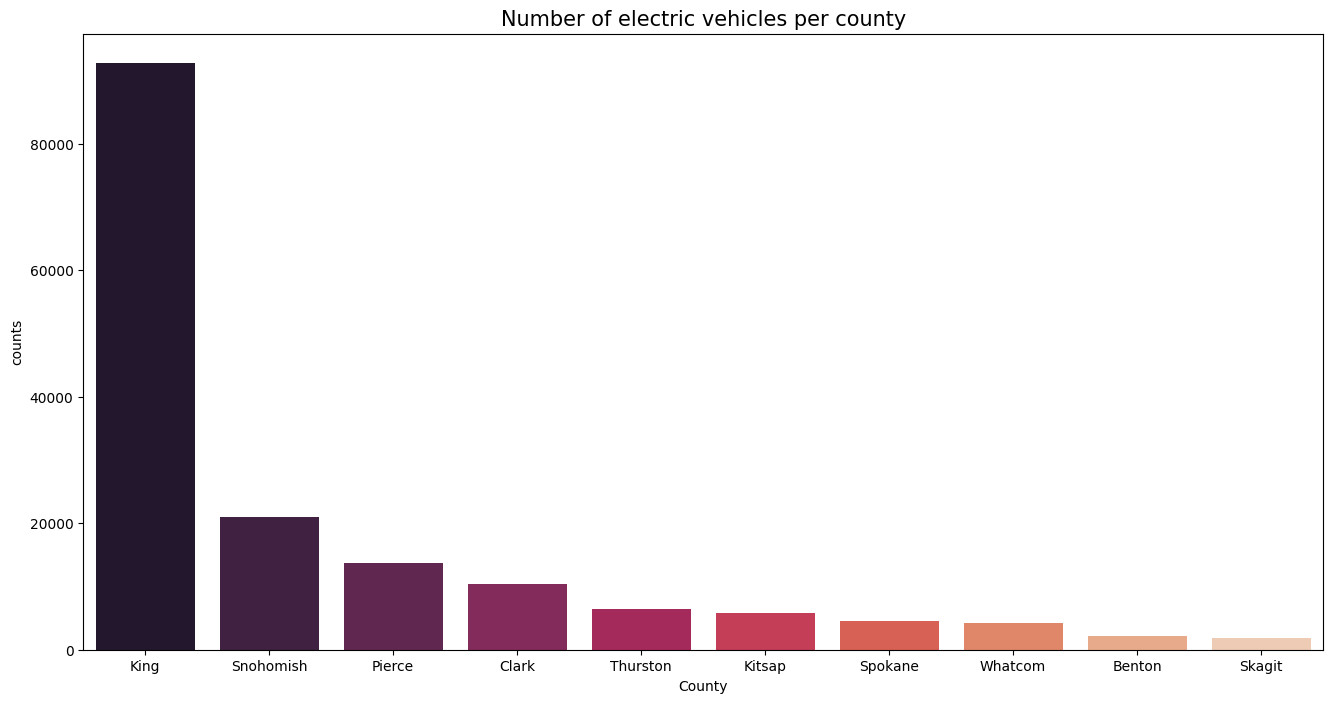

In [9]:
plt.figure(figsize=(16,8))
plt.title("Number of electric vehicles per county", fontsize= 15)
sns.barplot(x = county_counts.County[:10], y = county_counts.counts, data = county_counts, palette="rocket")

## Top 10 count of cars per City

In [10]:
city_counts = pd.DataFrame(ev_data.City.value_counts().reset_index())

In [11]:
city_counts.columns = ["City", "counts"]

In [12]:
city_counts.head(10)

,City,counts
0,Seattle,29447
1,Bellevue,8930
2,Redmond,6478
3,Vancouver,6193
4,Bothell,5863
5,Kirkland,5362
6,Sammamish,5280
7,Renton,4980
8,Olympia,4299
9,Tacoma,3722


<Axes: title={'center': 'Number of electric vehicles per city'}, xlabel='City', ylabel='counts'>

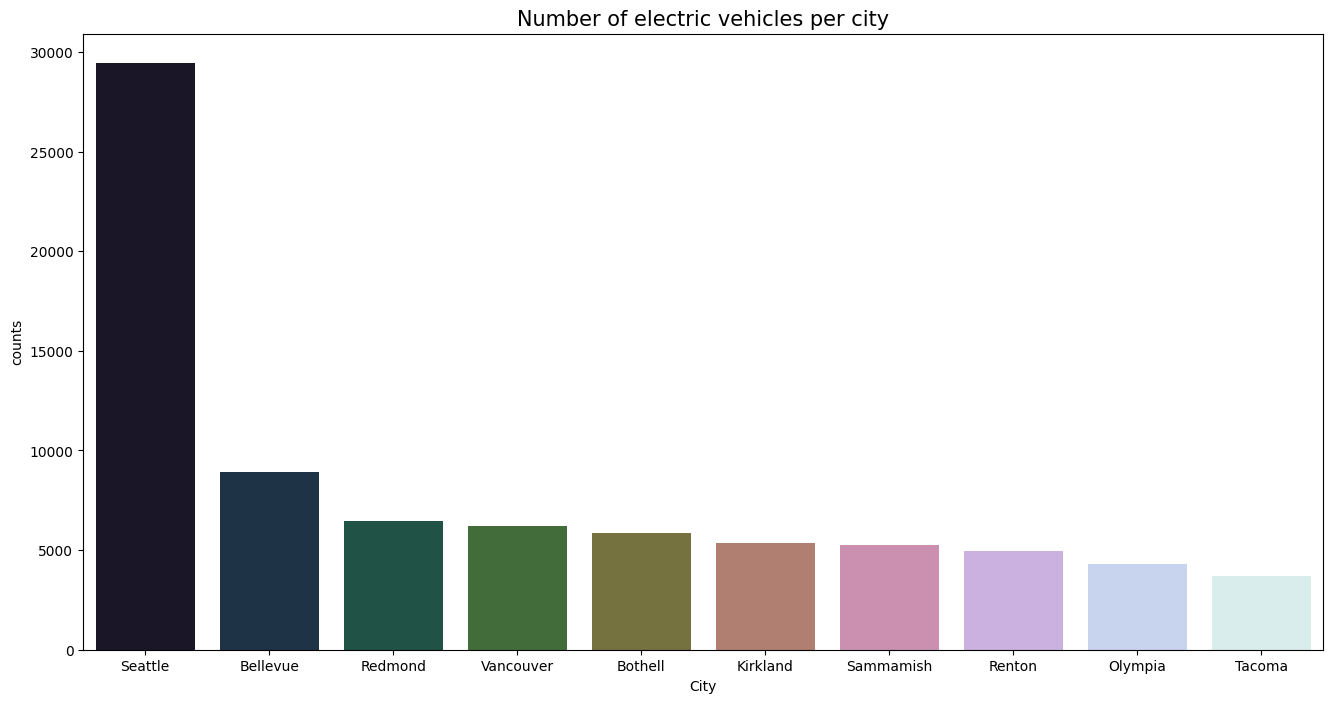

In [13]:
plt.figure(figsize=(16,8))
plt.title("Number of electric vehicles per city", fontsize= 15)
sns.barplot(x = city_counts.City[:10], y = city_counts.counts, data = city_counts, palette="cubehelix")

## Electric Vehicle Price by Model Year

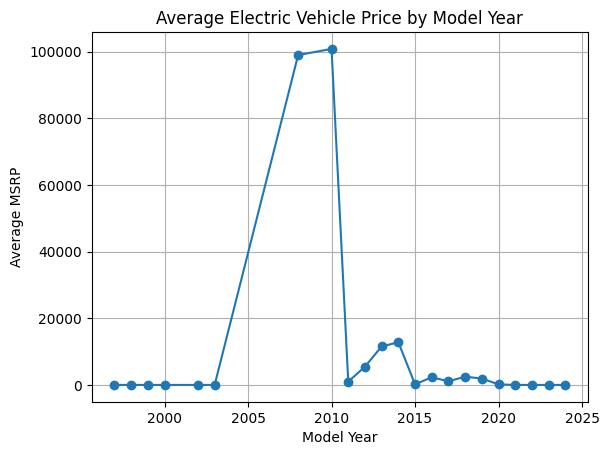

In [14]:
avg_price_by_year = ev_data.groupby('Model Year')['Base MSRP'].mean()

plt.plot(avg_price_by_year.index, avg_price_by_year.values, marker='o')
plt.title('Average Electric Vehicle Price by Model Year')
plt.xlabel('Model Year')
plt.ylabel('Average MSRP')
plt.grid()

## CAFV Eligibility by Vehicle Type

(array([0, 1]),
 [Text(0, 0, 'Battery Electric Vehicle (BEV)'),
  Text(1, 0, 'Plug-in Hybrid Electric Vehicle (PHEV)')])

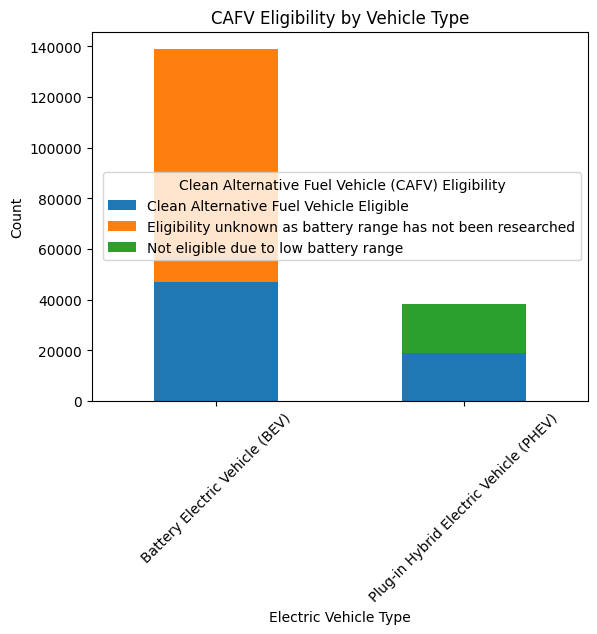

In [15]:
cafv_by_type = ev_data.groupby(['Electric Vehicle Type', 'Clean Alternative Fuel Vehicle (CAFV) Eligibility']).size().unstack()

cafv_by_type.plot(kind='bar', stacked=True)
plt.title('CAFV Eligibility by Vehicle Type')
plt.xlabel('Electric Vehicle Type')
plt.ylabel('Count')
plt.xticks(rotation=45)

## Average Electric Range by Make

Text(0.5, 0, 'Average Electric Range (miles)')

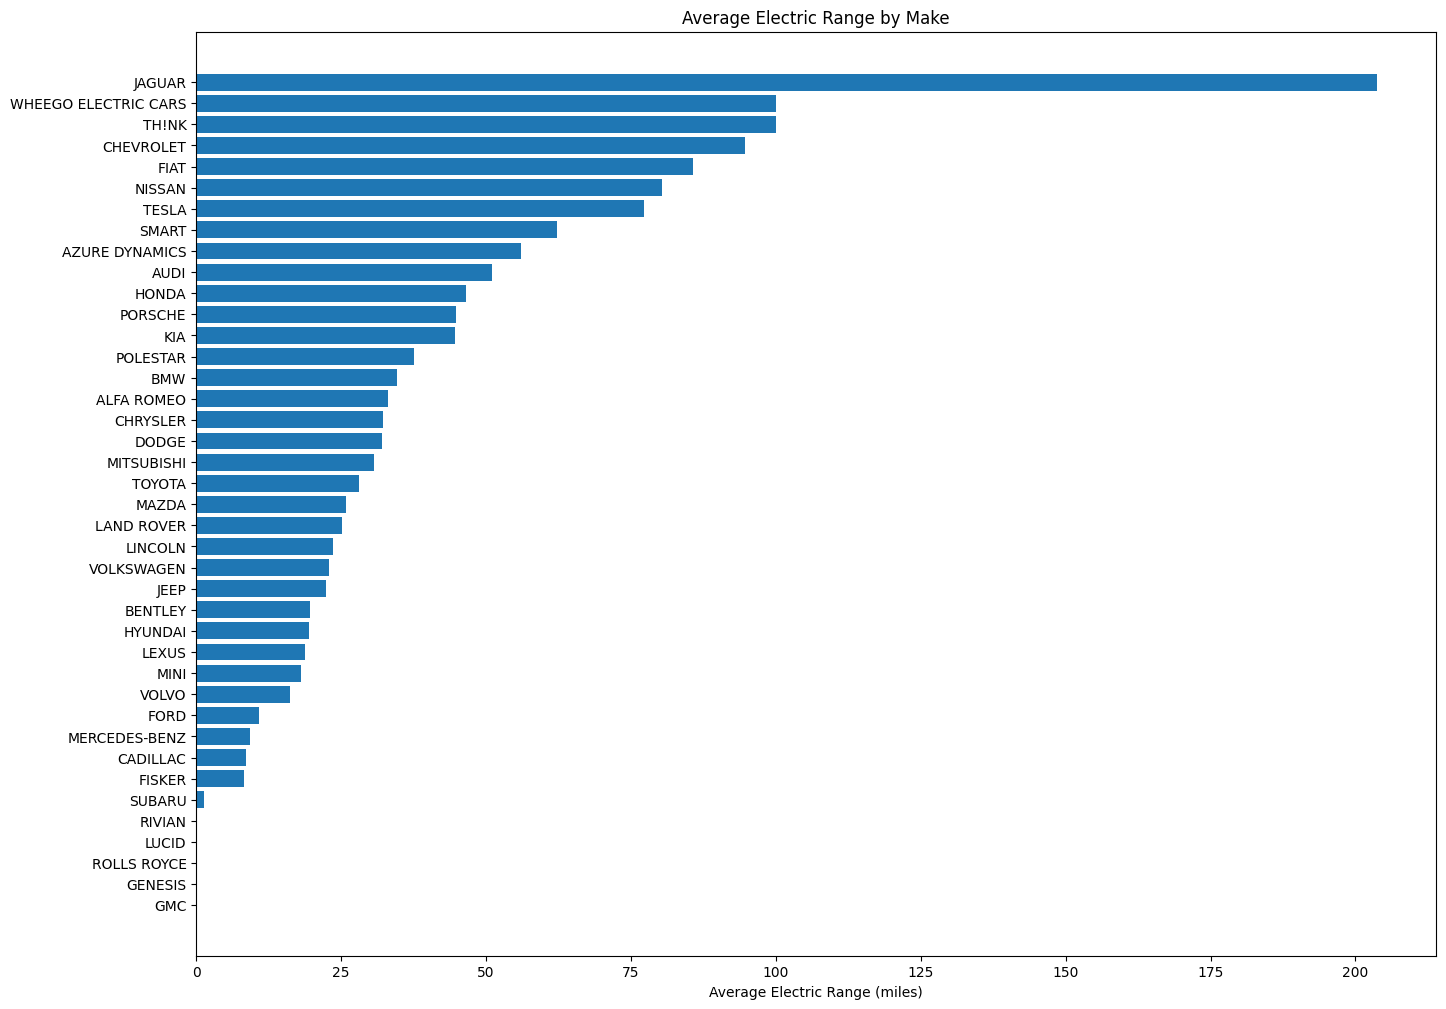

In [16]:
avg_range_by_make = ev_data.groupby('Make')['Electric Range'].mean().sort_values()
plt.figure(figsize=(16,12))
plt.barh(avg_range_by_make.index, avg_range_by_make.values)
plt.title('Average Electric Range by Make')
plt.xlabel('Average Electric Range (miles)')

## EV Registration Growth Rate by Year

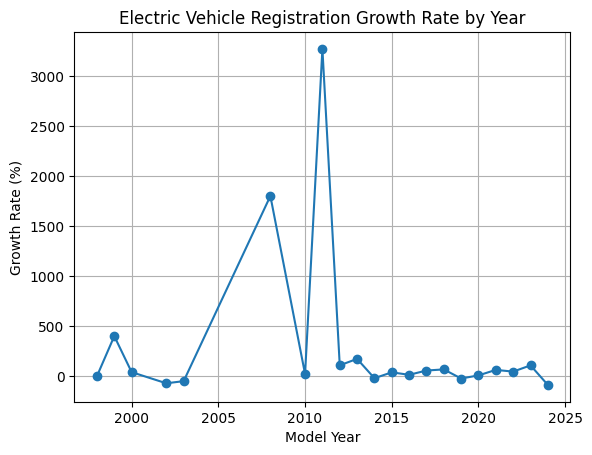

In [17]:
year_counts = ev_data['Model Year'].value_counts().sort_index()
growth_rate = year_counts.pct_change() * 100

plt.plot(growth_rate.index, growth_rate.values, marker='o')
plt.title('Electric Vehicle Registration Growth Rate by Year')
plt.xlabel('Model Year')
plt.ylabel('Growth Rate (%)')
plt.grid()

## Comparison of EV Types by Average MSRP

([0, 1],
 [Text(0, 0, 'Battery Electric Vehicle (BEV)'),
  Text(1, 0, 'Plug-in Hybrid Electric Vehicle (PHEV)')])

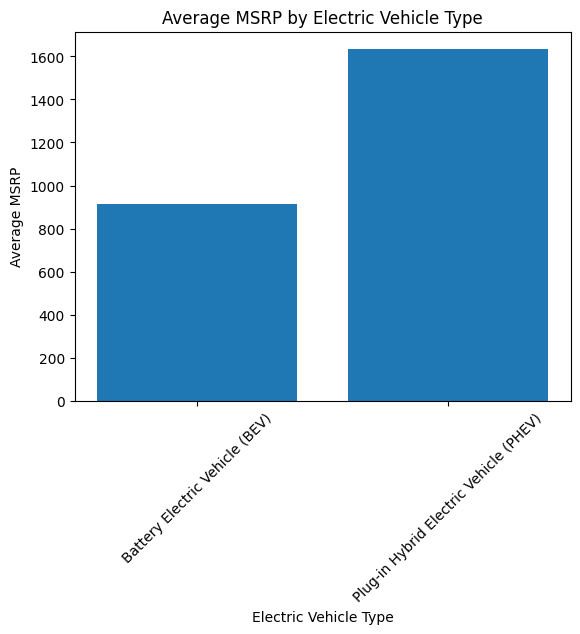

In [18]:
avg_msrp_by_type = ev_data.groupby('Electric Vehicle Type')['Base MSRP'].mean()

plt.bar(avg_msrp_by_type.index, avg_msrp_by_type.values)
plt.title('Average MSRP by Electric Vehicle Type')
plt.xlabel('Electric Vehicle Type')
plt.ylabel('Average MSRP')
plt.xticks(rotation=45)

## Electric Vehicle Adoption Rate by Year

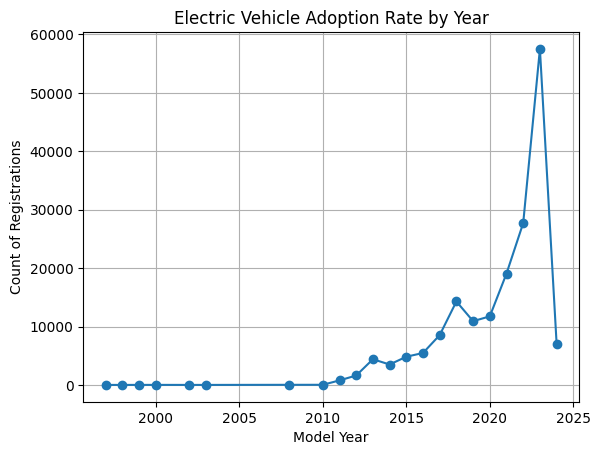

In [19]:
yearly_counts = ev_data['Model Year'].value_counts().sort_index()

plt.plot(yearly_counts.index, yearly_counts.values, marker='o')
plt.title('Electric Vehicle Adoption Rate by Year')
plt.xlabel('Model Year')
plt.ylabel('Count of Registrations')
plt.grid()

## Battery Electric Vehicles vs. Plug-in Hybrids by Electric Range

Text(0.5, 1.0, 'Electric Range Comparison: BEVs vs. PHEVs')

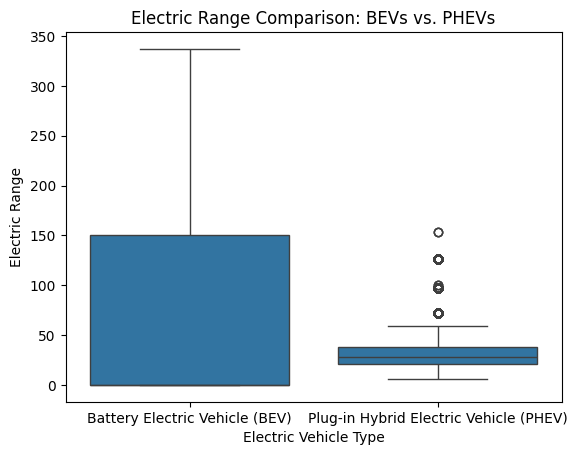

In [20]:
sns.boxplot(x='Electric Vehicle Type', y='Electric Range', data=ev_data)
plt.title('Electric Range Comparison: BEVs vs. PHEVs')

## Average Electric Range by Vehicle Type

([0, 1],
 [Text(0, 0, 'Battery Electric Vehicle (BEV)'),
  Text(1, 0, 'Plug-in Hybrid Electric Vehicle (PHEV)')])

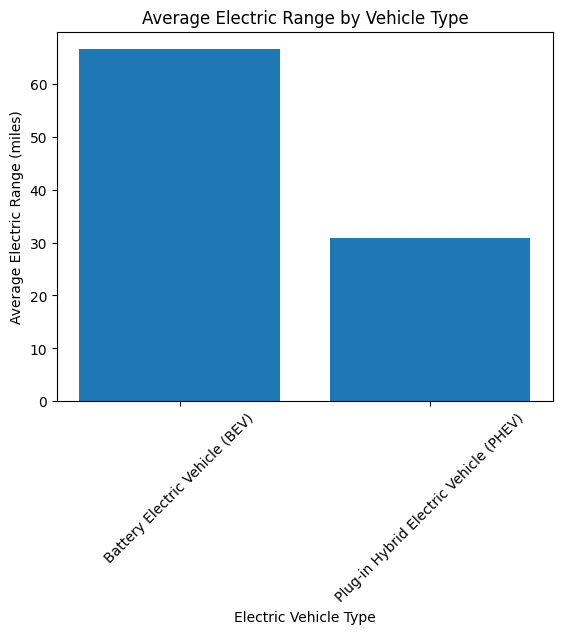

In [21]:
avg_range_by_type = ev_data.groupby('Electric Vehicle Type')['Electric Range'].mean()

plt.bar(avg_range_by_type.index, avg_range_by_type.values)
plt.title('Average Electric Range by Vehicle Type')
plt.xlabel('Electric Vehicle Type')
plt.ylabel('Average Electric Range (miles)')
plt.xticks(rotation=45)